In [3]:
import numpy as np

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as axisartist

In [5]:
from scipy.constants import proton_mass as m_i
from scipy.constants import elementary_charge as q_e

In [6]:
cross_helicity = np.loadtxt('../../writing_to_vtk/output/first_helicity_calculation/cross_helicity.txt')
kinetic_helicity = np.loadtxt('../../writing_to_vtk/output/first_helicity_calculation/kinetic_helicity.txt')
magnetic_helicity = np.loadtxt('../../writing_to_vtk/output/first_helicity_calculation/magnetic_helicity.txt')
time = np.arange(0, 250) * 0.068

# Gauge-dependent helicities 

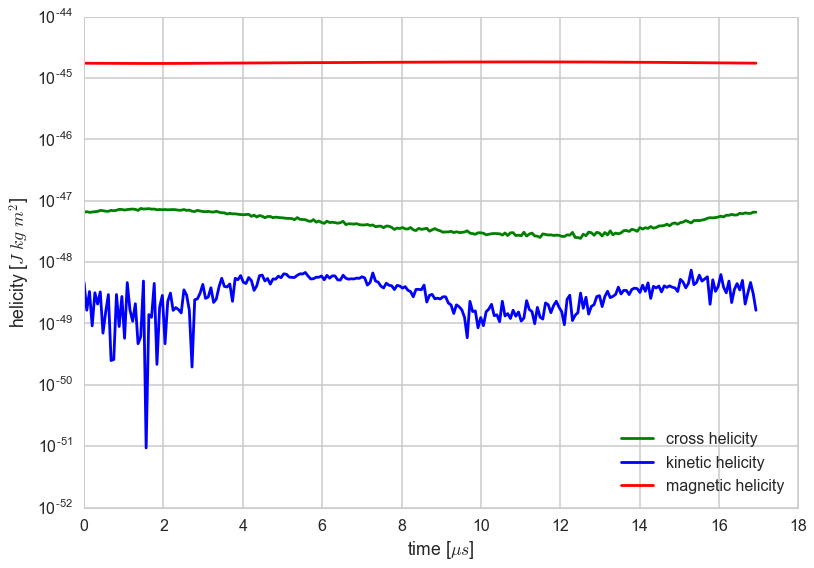

In [7]:
plt.plot(time, cross_helicity, c='green', label=r'cross helicity')
plt.plot(time, np.abs(kinetic_helicity), c='blue', label=r'kinetic helicity')
plt.plot(time, magnetic_helicity, c='red', label=r'magnetic helicity')
plt.ylabel(r'helicity [$J \ kg \ m^2$]')
plt.xlabel(r'time [$\mu s$]')
plt.yscale('log')
#plt.ylim((-1e-49, 1e-43))
plt.legend(loc='best')

# Gauge-dependent helicities with different scales

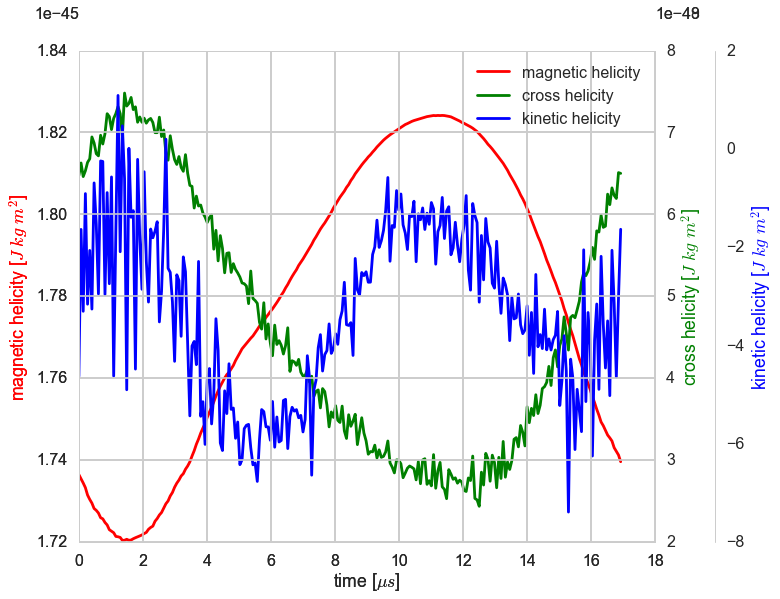

In [8]:
host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par2,
                                    offset=(offset, 0))

par2.axis["right"].toggle(all=True)

#    host.set_xlim(0, 2)
#    host.set_ylim(0, 2)

host.set_xlabel(r"time [$\mu s$]")
host.set_ylabel(r'magnetic helicity [$J \ kg \ m^2$]')
par1.set_ylabel(r"cross helicity [$J \ kg \ m^2$]")
par2.set_ylabel(r"kinetic helicity [$J \ kg \ m^2$]")

p1, = host.plot(time, magnetic_helicity, label="magnetic helicity", c='red')
p2, = par1.plot(time, cross_helicity, label="cross helicity", c='green')
p3, = par2.plot(time, kinetic_helicity, label="kinetic helicity", c='blue')

#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

plt.draw()
plt.show()

# Compare to nondimensional scaling factors

The non-dimensional form of the three helicity relation is:
    
$\frac{K_0}{q_0^2 B_0^2 l_0^4} \bar{K}_\sigma = \frac{1}{S_0^2} \bar{\mathcal{H}}_\sigma + \frac{1}{S_0} \bar{\mathcal{X}}_\sigma + \bar{\mathcal{K}}$

$\bar{K}_\sigma = \frac{1}{S_0^2} \bar{\mathcal{H}}_\sigma + \frac{1}{S_0} \bar{\mathcal{X}}_\sigma + \bar{\mathcal{K}}$

$S_0$ is the scale length over the Larmor radius $S_0 = \frac{l_0}{r_{L}}$.

In the treatment of spheromak merging and collimating jets from flared fields we have taken $r_{L}$ to be the Larmor radius of an Aflvenic particle since these phenomena developed alfvenic flows.
However RSX flows are sonic and sub-alfvenic so it may be more approriate to take $r_{L}$ to be the Larmor radius of a sonic particle.

I take RSX axial length $l_0=0.5m$, the RSX bias $B_0=0.02T$ , the electron charge $q_0=1.6*\cdot10^{-19}C$, the ion mass $m_0=1.67\cdot10^{-27}kg$.

The Afven speed in RSX is $140 km/s$ this corresponds to an $1/S_0\approx0.14$, $1/S_0^2\approx0.02$. 
The sound speed in RSX is $10 km/s$ this corresponds to an $1/S_0\approx0.02$, $1/S_0^2\approx0.0004$.


# Normalized helicities with $S_0^{-1}$ and $S_0^{-2}$ using Alfven velocity as $u_0$

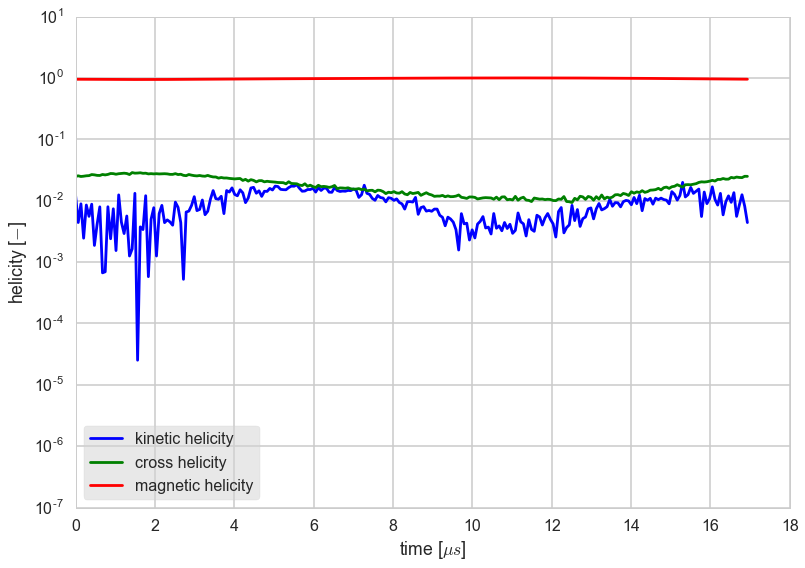

In [32]:
max_helicity = magnetic_helicity.max()
plt.plot(time, np.abs(kinetic_helicity/max_helicity)*7**2, c='blue', label=r'kinetic helicity')
plt.plot(time, cross_helicity/max_helicity*7, c='green', label=r'cross helicity')
plt.plot(time, magnetic_helicity/max_helicity, c='red', label=r'magnetic helicity')

plt.ylabel(r'helicity [$-$]')
plt.xlabel(r'time [$\mu s$]')
plt.yscale('log')
plt.ylim((1e-7, 1e1))
legend = plt.legend(fancybox=True, frameon=True, framealpha=0.5, loc='best')
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

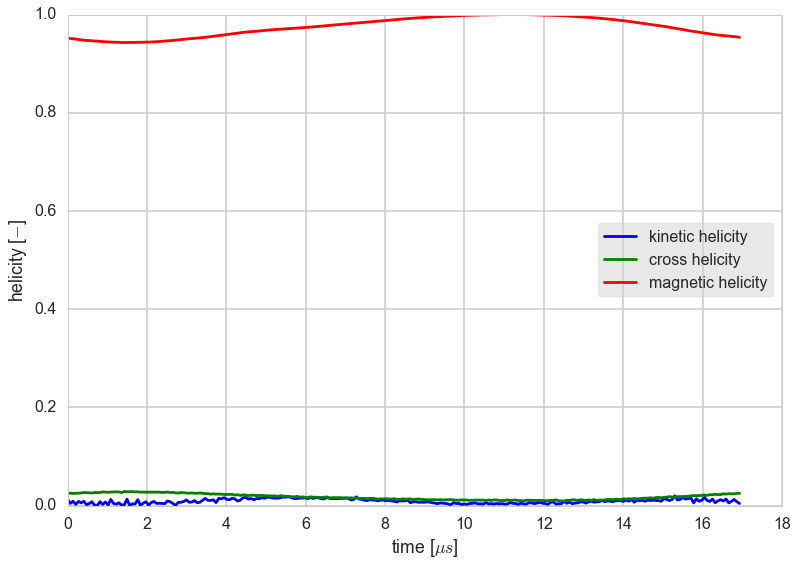

In [49]:
max_helicity = magnetic_helicity.max()
plt.plot(time, np.abs(kinetic_helicity/max_helicity)*7**2, c='blue', label=r'kinetic helicity')
plt.plot(time, cross_helicity/max_helicity*7, c='green', label=r'cross helicity')
plt.plot(time, magnetic_helicity/max_helicity, c='red', label=r'magnetic helicity')

plt.ylabel(r'helicity [$-$]')
plt.xlabel(r'time [$\mu s$]')
legend = plt.legend(fancybox=True, frameon=True, framealpha=0.5, loc='best')
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

# Normalized helicities with $S_0^{-1}$ and $S_0^{-2}$ using sound speed as $u_0$

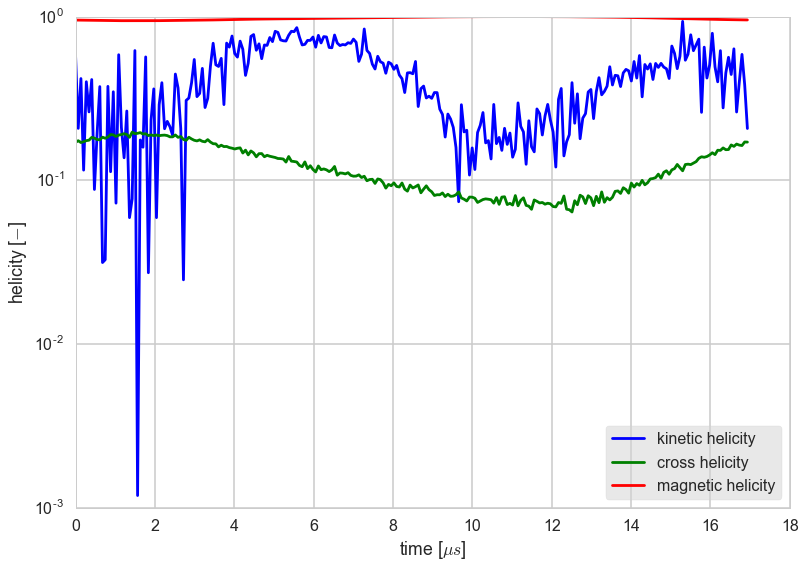

In [45]:
max_helicity = magnetic_helicity.max()
plt.plot(time, np.abs(kinetic_helicity/max_helicity*48**2), c='blue', label=r'kinetic helicity')
plt.plot(time, cross_helicity/max_helicity*48, c='green', label=r'cross helicity')
plt.plot(time, magnetic_helicity/max_helicity, c='red', label=r'magnetic helicity')

plt.ylabel(r'helicity [$-$]')
plt.xlabel(r'time [$\mu s$]')
plt.yscale('log')
legend = plt.legend(fancybox=True, frameon=True, framealpha=0.5, loc='best')
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

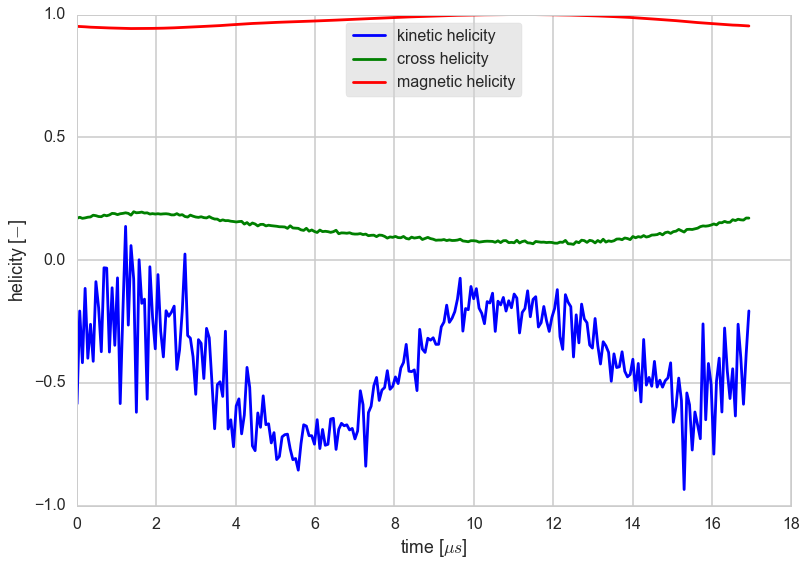

In [50]:
max_helicity = magnetic_helicity.max()
plt.plot(time, kinetic_helicity/max_helicity*48**2, c='blue', label=r'kinetic helicity')
plt.plot(time, cross_helicity/max_helicity*48, c='green', label=r'cross helicity')
plt.plot(time, magnetic_helicity/max_helicity, c='red', label=r'magnetic helicity')

plt.ylabel(r'helicity [$-$]')
plt.xlabel(r'time [$\mu s$]')
legend = plt.legend(fancybox=True, frameon=True, framealpha=0.5, loc='best')
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

In [34]:
m_0 = 1.67*10**-27 
q_0 = 1.6*10**-19
l_0 = 0.5
B_0 = 0.02
u_0_a = 1.4*10**5
u_0_cs = 20*10**3

In [39]:
kinetic_divider = m_0**2 * u_0_a**2 * l_0**4 
cross_divider = m_0*q_0 * u_0_a * B_0*l_0**3
magnetic_divider = q_0**2*B_0**2*l_0**4

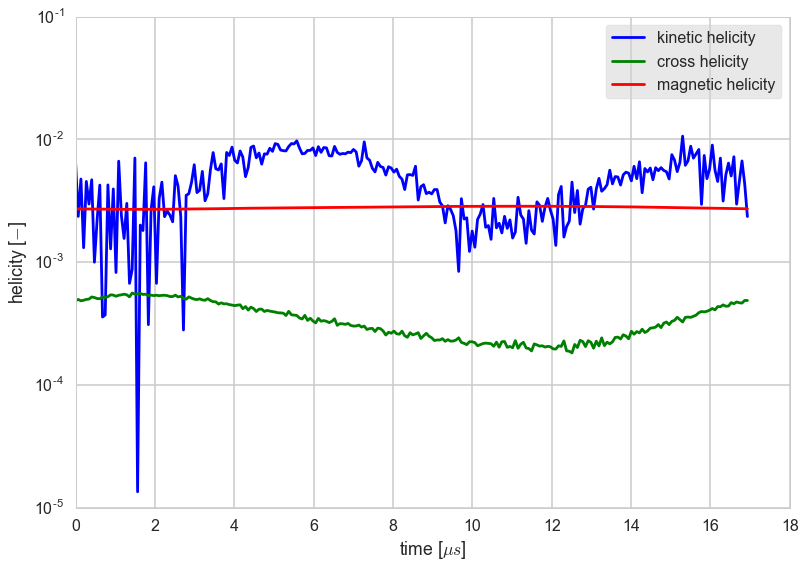

In [59]:
max_helicity = magnetic_helicity.max()
plt.plot(time, np.abs(kinetic_helicity/kinetic_divider)*7**2, c='blue', label=r'kinetic helicity')
plt.plot(time, cross_helicity/cross_divider*7, c='green', label=r'cross helicity')
plt.plot(time, magnetic_helicity/magnetic_divider, c='red', label=r'magnetic helicity')

plt.ylabel(r'helicity [$-$]')
plt.xlabel(r'time [$\mu s$]')
plt.yscale('log')
legend = plt.legend(fancybox=True, frameon=True, framealpha=0.5, loc='best')
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

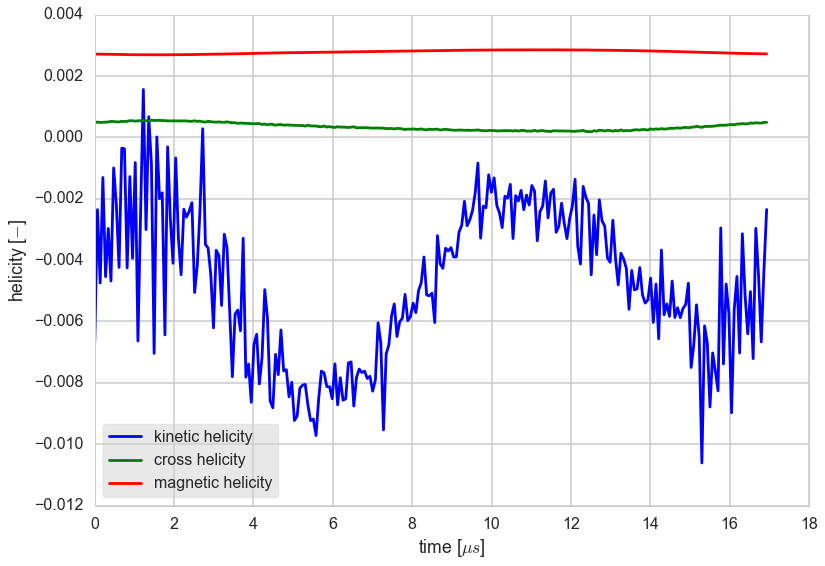

In [52]:
max_helicity = magnetic_helicity.max()
plt.plot(time, kinetic_helicity/kinetic_divider*7**2, c='blue', label=r'kinetic helicity')
plt.plot(time, cross_helicity/cross_divider*7, c='green', label=r'cross helicity')
plt.plot(time, magnetic_helicity/magnetic_divider, c='red', label=r'magnetic helicity')

plt.ylabel(r'helicity [$-$]')
plt.xlabel(r'time [$\mu s$]')
legend = plt.legend(fancybox=True, frameon=True, framealpha=0.5, loc='best')
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

In [41]:
kinetic_divider_cs = m_0**2 * u_0_cs**2 * l_0**4 
cross_divider_cs = m_0*q_0 * u_0_cs * B_0*l_0**3
magnetic_divider_cs = q_0**2*B_0**2*l_0**4

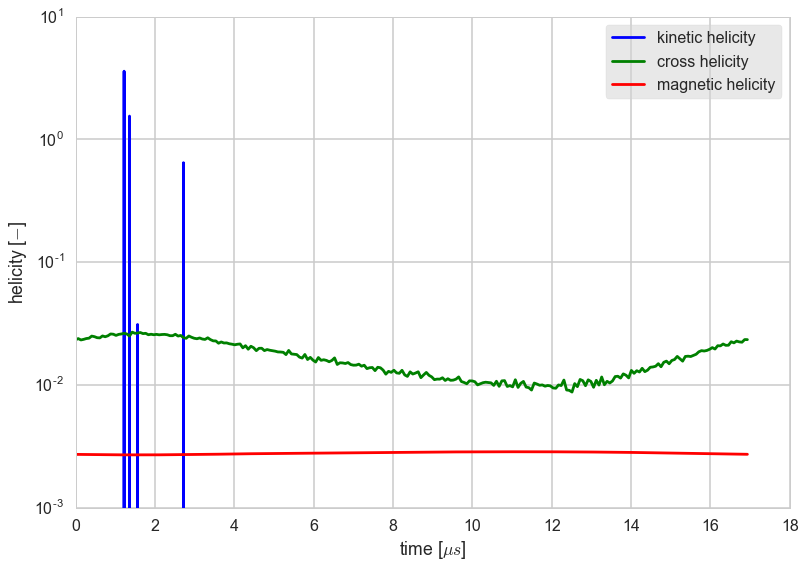

In [53]:
max_helicity = magnetic_helicity.max()
plt.plot(time, np.abs(kinetic_helicity/kinetic_divider_cs)*48**2, c='blue', label=r'kinetic helicity')
plt.plot(time, cross_helicity/cross_divider_cs*48, c='green', label=r'cross helicity')
plt.plot(time, magnetic_helicity/magnetic_divider_cs, c='red', label=r'magnetic helicity')

plt.ylabel(r'helicity [$-$]')
plt.xlabel(r'time [$\mu s$]')
plt.yscale('log')

legend = plt.legend(fancybox=True, frameon=True, framealpha=0.5, loc='best')
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

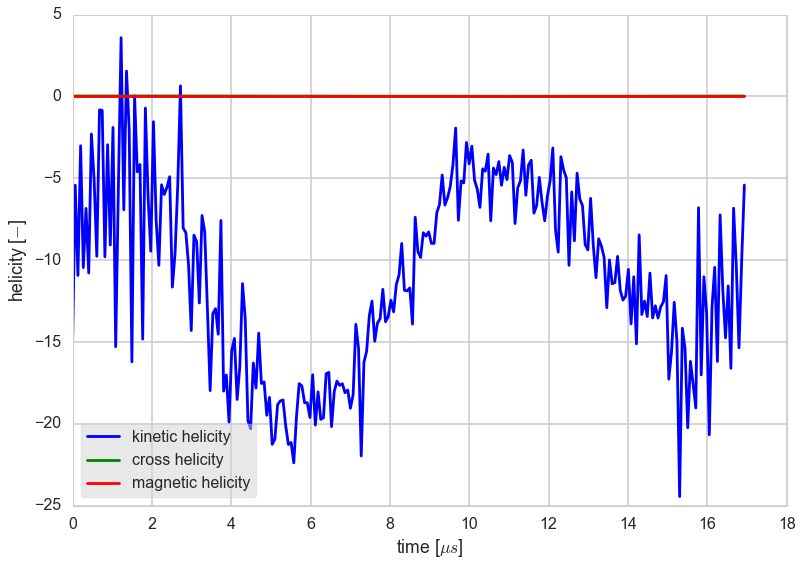

In [58]:
max_helicity = magnetic_helicity.max()
plt.plot(time, kinetic_helicity/kinetic_divider_cs*48**2, c='blue', label=r'kinetic helicity')
plt.plot(time, cross_helicity/cross_divider_cs*48, c='green', label=r'cross helicity')
plt.plot(time, magnetic_helicity/magnetic_divider_cs, c='red', label=r'magnetic helicity')

plt.ylabel(r'helicity [$-$]')
plt.xlabel(r'time [$\mu s$]')
legend = plt.legend(fancybox=True, frameon=True, framealpha=0.5, loc='best')
frame = legend.get_frame()
frame.set_facecolor('lightgrey')